In [2]:
import pandas as pd

In [26]:
df = pd.read_csv("../CHURN.csv")

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print df.shape

(7043, 21)


In [7]:
print df.columns

Index([u'customerID', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'MultipleLines', u'InternetService',
       u'OnlineSecurity', u'OnlineBackup', u'DeviceProtection', u'TechSupport',
       u'StreamingTV', u'StreamingMovies', u'Contract', u'PaperlessBilling',
       u'PaymentMethod', u'MonthlyCharges', u'TotalCharges', u'Churn'],
      dtype='object')


In [8]:
df.Churn.value_counts()
# unbalanced classes


No     5174
Yes    1869
Name: Churn, dtype: int64

In [30]:
df[['Partner', 'Dependents', 'PhoneService',  
    'InternetService', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
    'Churn']] = df[['Partner', 'Dependents', 'PhoneService', 
                    'InternetService', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                    'Churn']].replace({'Yes': 1, 'No': 0})

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [32]:
df.to_csv("Clean_Churn_data.csv")

#  27% Churn: 
- need to discuss whether we have a prior or some kind of industry benchmark ("punto de referencia") 

- other industries have MUCH higher churn rate.  Explain if this dataset is industry-standard


In [16]:
import math
print(5174/7043)
.734

0


# What are are the Correlations? 

In [34]:
df2 = pd.read_csv("../Clean_Churn_data.csv")

IOError: File ../Clean_Churn_data.csv does not exist

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

In [42]:
churn_data = df[['tenure', "Churn", 'PaperlessBilling', 'Partner', 'Dependents']]

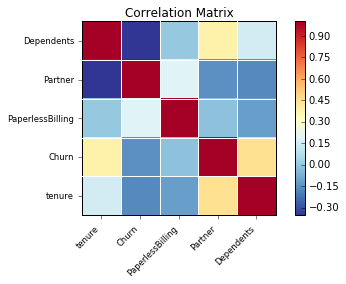

In [43]:

corr_matrix = np.corrcoef(churn_data.T)
smg.plot_corr(corr_matrix, xnames=churn_data)
plt.show()

# CODE COMODE

In [23]:

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [18]:
# churn_data = df[['tenure', "Churn"]]
# df[['A', 'B']]
churn_data.head()

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1


In [ ]:
# for i in df:
#     if i == "Yes":
#         i = 1
#     elif i == "No":
#         i = 0

# pd.Series(map(lambda x: dict(Yes=1, No=0)[x],
#               df.Partner.values.tolist()), df.index)

